In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Superstore Sales Dataset.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing Values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
Number of duplicate rows: 0


In [5]:
#impute the missing values with the mode
df['Postal Code'].fillna(df.mode, inplace=True)

<ipython-input-5-daba4a97b587>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df.mode, inplace=True)
<ipython-input-5-daba4a97b587>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method DataFrame.mode of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Cl

In [6]:
# Check for duplicates based on Order ID
duplicates = df.duplicated
print(duplicates)
# print(f"Number of duplicate Order IDs: {duplicates}")

# # Drop duplicates
# df.drop_duplicates(inplace=True)


<bound method DataFrame.duplicated of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520

In [7]:
#Convert Date Columns to Datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') # Added format argument to specify the correct date format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') # Added format argument to specify the correct date format

In [8]:
#Calculate Delivery Time
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days


In [9]:
shipping_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
print(shipping_sales)


        Ship Mode         Sales
0     First Class  3.455723e+05
1        Same Day  1.252190e+05
2    Second Class  4.499142e+05
3  Standard Class  1.340831e+06


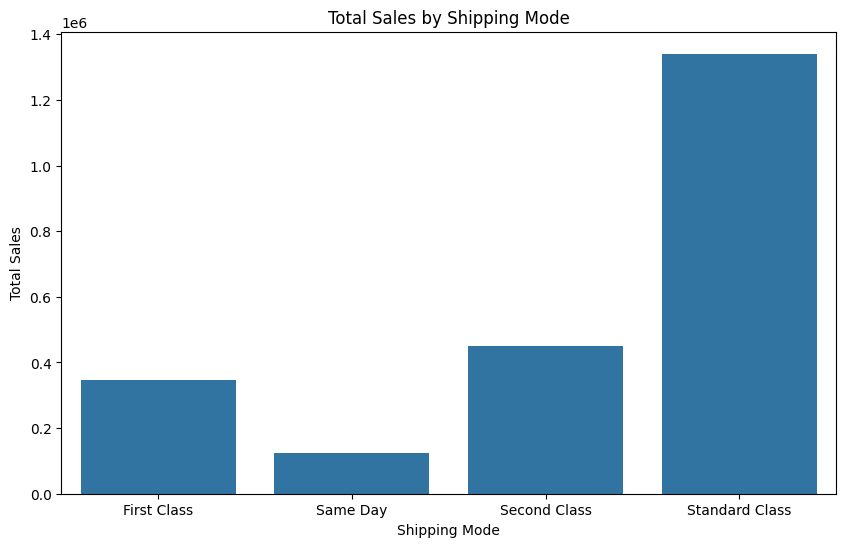

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=shipping_sales)
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.show()


In [11]:
delivery_time_by_mode = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()
print(delivery_time_by_mode)


        Ship Mode  Delivery Time
0     First Class       2.179214
1        Same Day       0.044610
2    Second Class       3.249211
3  Standard Class       5.008363


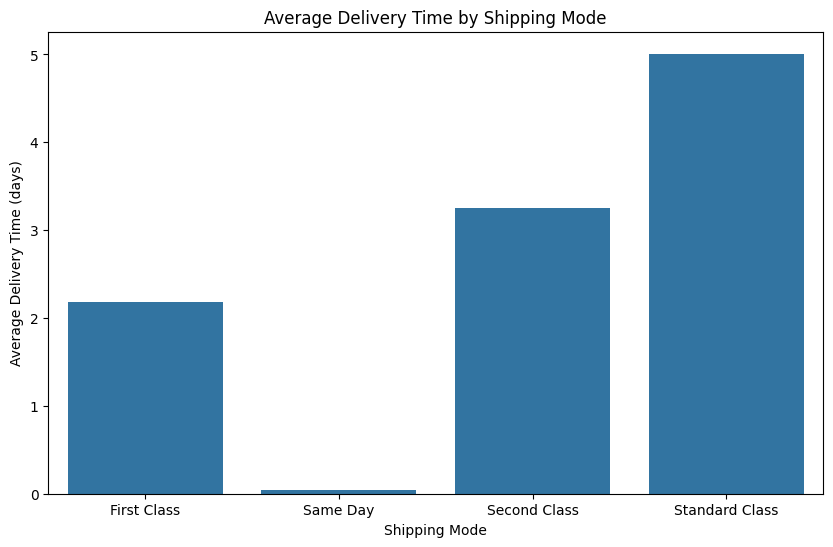

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Delivery Time', data=delivery_time_by_mode)
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delivery Time (days)')
plt.show()


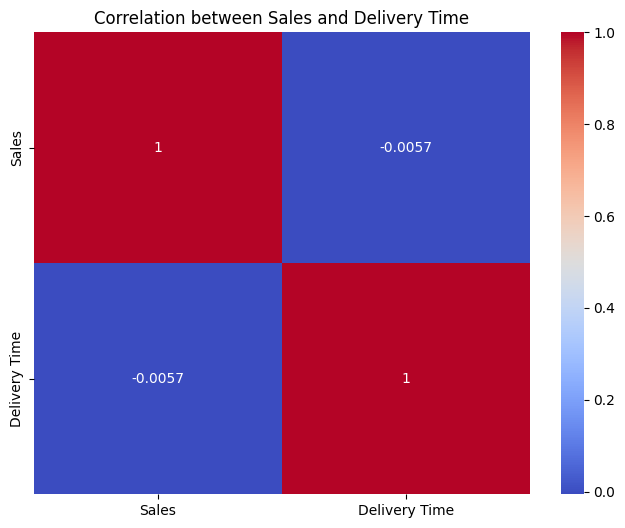

In [13]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Delivery Time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Delivery Time')
plt.show()


In [14]:
regional_sales = df.groupby(['Region', 'State'])['Sales'].sum().reset_index()
print(regional_sales)


     Region                 State        Sales
0   Central              Illinois   79236.5170
1   Central               Indiana   48718.4000
2   Central                  Iowa    4443.5600
3   Central                Kansas    2914.3100
4   Central              Michigan   76136.0740
5   Central             Minnesota   29863.1500
6   Central              Missouri   22205.1500
7   Central              Nebraska    7464.9300
8   Central          North Dakota     919.9100
9   Central              Oklahoma   19683.3900
10  Central          South Dakota    1315.5600
11  Central                 Texas  168572.5322
12  Central             Wisconsin   31173.4300
13     East           Connecticut   13384.3570
14     East              Delaware   27322.9990
15     East  District of Columbia    2865.0200
16     East                 Maine    1270.5300
17     East              Maryland   23705.5230
18     East         Massachusetts   28634.4340
19     East         New Hampshire    7292.5240
20     East  

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

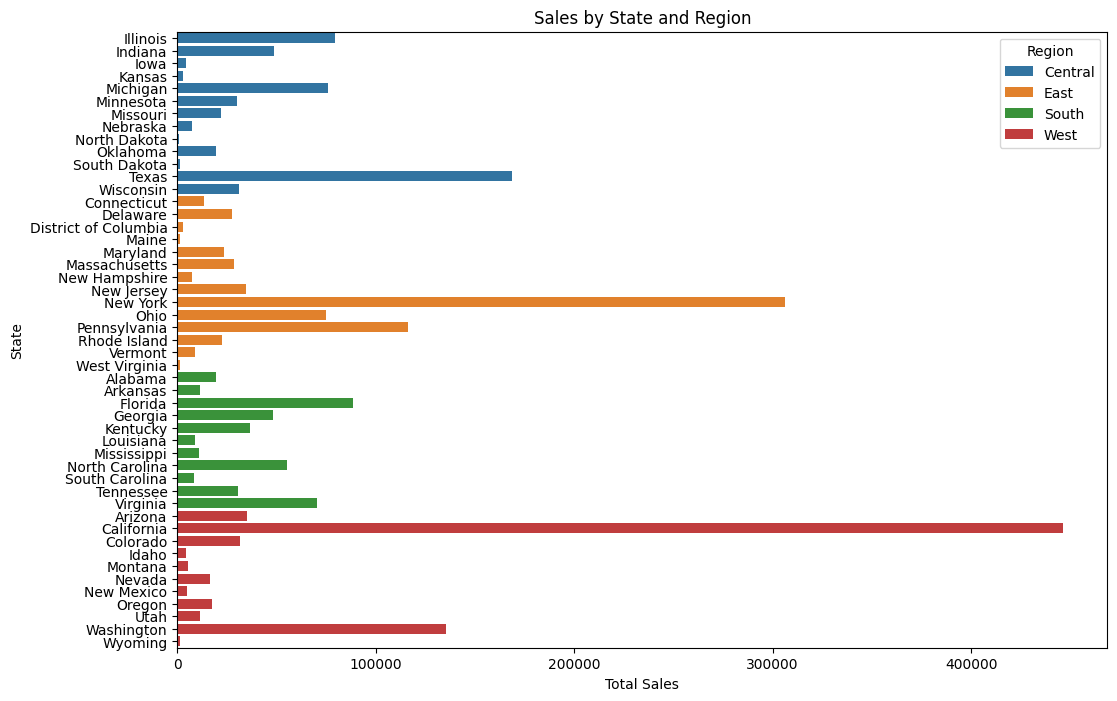

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='State', hue='Region', data=regional_sales)
plt.title('Sales by State and Region')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


In [16]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby(['Month', 'Region'])['Sales'].sum().reset_index()
print(monthly_sales)


       Month   Region       Sales
0    2015-01  Central   1533.9660
1    2015-01     East    436.1740
2    2015-01    South   9296.8440
3    2015-01     West   2938.7230
4    2015-02  Central   1233.1740
..       ...      ...         ...
187  2018-11     West  28718.2070
188  2018-12  Central  18883.0708
189  2018-12     East  19285.4860
190  2018-12    South  15209.7370
191  2018-12     West  29652.0950

[192 rows x 3 columns]


In [17]:
growth_rates = monthly_sales.groupby('Region')['Sales'].pct_change().reset_index()
print(growth_rates)


     index     Sales
0        0       NaN
1        1       NaN
2        2       NaN
3        3       NaN
4        4 -0.196088
..     ...       ...
187    187  0.354435
188    188  0.245998
189    189 -0.577384
190    190 -0.465036
191    191  0.032519

[192 rows x 2 columns]


In [18]:
customer_segmentation = df.groupby('Customer ID').agg({'Sales': 'sum', 'Order ID': 'count'}).reset_index()
customer_segmentation.columns = ['Customer ID', 'Total Sales', 'Purchase Frequency']
print(customer_segmentation)


    Customer ID  Total Sales  Purchase Frequency
0      AA-10315     5563.560                  11
1      AA-10375     1056.390                  15
2      AA-10480     1790.512                  12
3      AA-10645     5086.935                  18
4      AB-10015      886.156                   6
..          ...          ...                 ...
788    XP-21865     2374.658                  28
789    YC-21895     5454.350                   8
790    YS-21880     6720.444                  12
791    ZC-21910     8025.707                  31
792    ZD-21925     1493.944                   9

[793 rows x 3 columns]


In [19]:
segment_analysis = df.groupby(['Segment', 'Region'])['Sales'].sum().reset_index()
print(segment_analysis)


        Segment   Region        Sales
0      Consumer  Central  250210.5220
1      Consumer     East  347906.6050
2      Consumer    South  194702.2130
3      Consumer     West  355241.1910
4     Corporate  Central  152031.4968
5     Corporate     East  195897.4250
6     Corporate    South  120546.8745
7     Corporate     West  220018.2785
8   Home Office  Central   90404.8944
9   Home Office     East  125714.6960
10  Home Office    South   73902.3715
11  Home Office     West  134960.2150


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

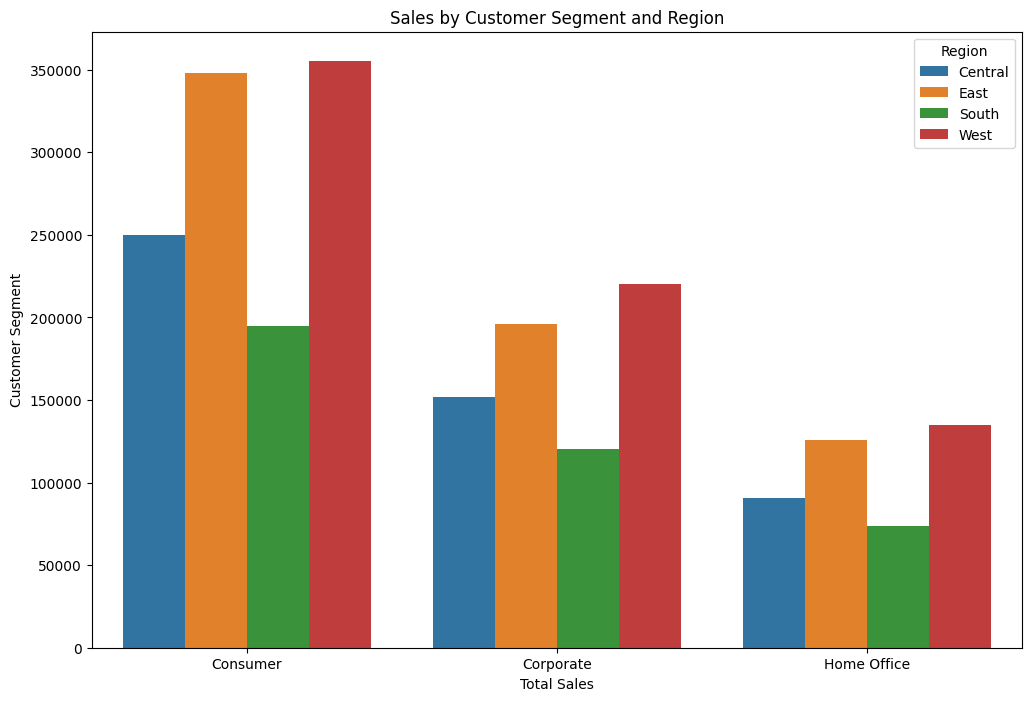

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', hue='Region', data=segment_analysis)
plt.title('Sales by Customer Segment and Region')
plt.xlabel('Total Sales')
plt.ylabel('Customer Segment')
plt.show()


In [21]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
print(category_sales)


          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


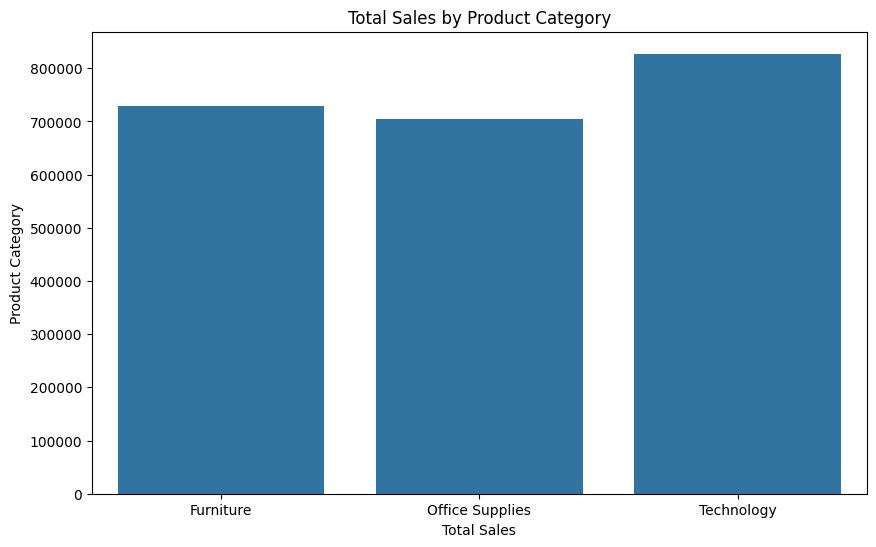

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()


In [23]:
# Convert the "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# yearly_sales =
# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


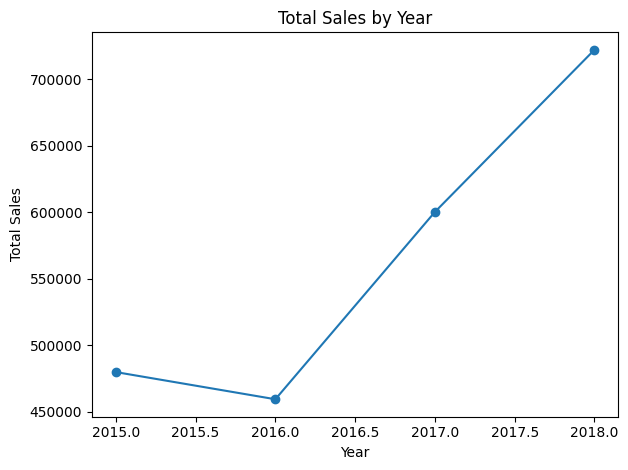

In [24]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()

plt.show()

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the quarterly sales for 2018
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2018:")
print(quarterly_sales)

Quarterly Sales for 2018:
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


<ipython-input-25-ff59bf2f215e>:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()


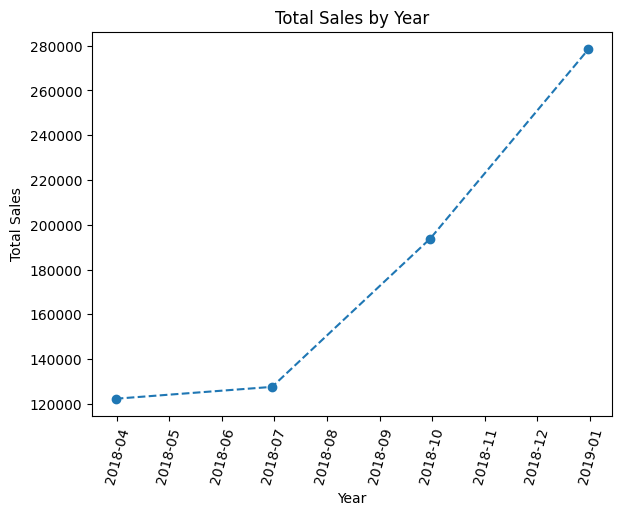

In [26]:
# Create a line graph for total sales by year
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [28]:
# Group the data by product sub category versus the sales
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False)

# Print the states
print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


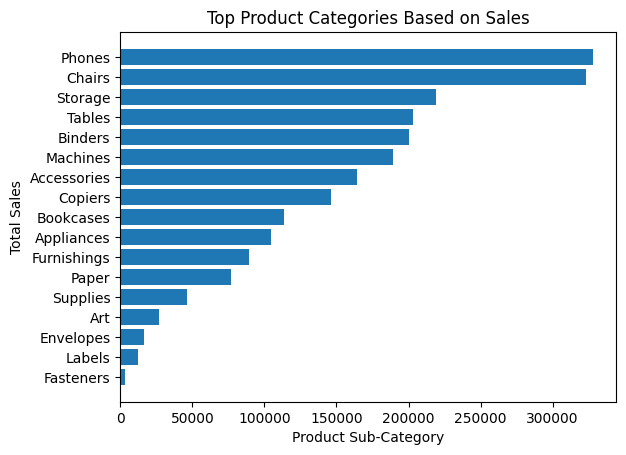

In [29]:
top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()

In [27]:
# Assuming 'df' is your cleaned DataFrame
df.to_csv('Superstore Sales Dataset.csv', index=False)
